In [40]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [42]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.ext.declarative import declarative_base

In [43]:
#? what is diference from sqlite vs csv file | we can't read anything in sqlite, sqlite is a database file
#? create engine and connect is to connect the sqlite database to any apps using Python languages)
## step 1: data_path -> read that path by pd.read_sql() or engine.execute("select * from hwaii",connect) 
## step 2: create engine -> engine = create_engine(f"sqlite:///{data_path}") | engine = create_engine("sqlite://hawaii.sqlite")
## step 3: connect engine by connect = engine.connect() | if we wanna use Pandas for next steps, the object can be paste to Pandas
# Base = before going to define the Class |table 
# when to use DB Browser? to read sqlite file, to browse the sqlite file or even create table. 
# use session.query() is to call data from the file


In [44]:
# create engine to hawaii.sqlite | create a virtual database itself to do further step here 

database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")
# engine = create_engine("sqlite:///hawaii.sqlite")
# Base = declarative_base()

In [45]:
# reflect an existing database into a new model: sqlite is a database containing 2 tables that we connect then reflect them now
# ref. day 2, student reflection activity 
connect = engine.connect()
data_measurement = engine.execute("SELECT * FROM measurement")
data_station = engine.execute("SELECT * FROM station")

In [46]:
# View all of the classes that automap found : reflect 2 table available in DB Browser (measurement | station)
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table : class | bcoz the 2 tables are already available -> 
# no need to create Class __table__ : simpler way here is to use Base.classes.table_name
measurement = Base.classes.measurement
station = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB : refer day 2 , 1 or 2 activity 
# purpose of this session? 
session = Session(engine)


# Exploratory Precipitation Analysis

In [49]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [50]:
# Earliest Date
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01',)

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# How to retrieve data in 2017 only? or between the 2 given dates 


In [52]:
import datetime as dt

In [53]:
# Calculate the date one year from the last date in data set.
oneyear_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Date since one year from the last day is: ", oneyear_date)

Date since one year from the last day is:  2016-08-23


In [54]:
# Get a list of column names and types for reference first
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [55]:
# same task with station table
inspector = inspect(engine)
inspector.get_table_names()
columns1 = inspector.get_columns('station')
for c in columns1:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [56]:
# Perform a query to retrieve the data and precipitation scores from measuremnt table
# opt 1: call all data without limit timing

tracie1 = session.query(measurement.date, measurement.prcp).all()

#write into a df to have pretty view
panda1 = pd.DataFrame(tracie1,columns = ["Date","Rainfall"])
panda1

,Date,Rainfall
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [65]:
# Perform a query to retrieve the data and precipitation scores
# for the most recent 12 months
tracie = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= oneyear_date).all()
tracie

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [66]:
# Save the query results as a Pandas DataFrame and set the index to the date column
panda = pd.DataFrame(tracie,columns = ["Date","Rainfall"])
panda

,Date,Rainfall
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [67]:
# Sort the dataframe by date
panda_sort = panda.sort_values("Date")
panda_sort

,Date,Rainfall
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


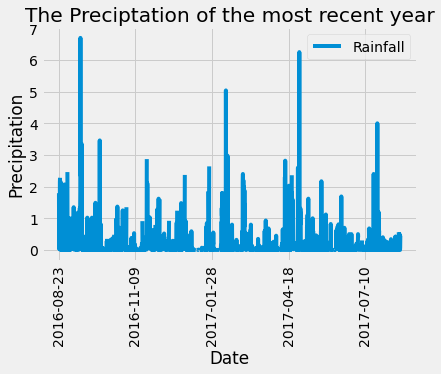

In [68]:
# Use Pandas Plotting with Matplotlib to plot the data
panda_sort.plot(x="Date",y="Rainfall",rot = 90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("The Preciptation of the most recent year")
plt.show()

In [61]:
# Use Pandas to calculate the summary statistics for the precipitation data 
panda_sort.describe()

,Rainfall
count,5.000000
mean,0.032000
std,0.043818
min,0.000000
25%,0.000000
50%,0.000000
75%,0.080000
max,0.080000


In [62]:
# try one kind of query with condition
session.query(measurement.station,measurement.prcp,measurement.date).\
    filter(measurement.date < '2017-08-23').\
    order_by(measurement.date).limit(10).all()

[('USC00519397', 0.08, '2010-01-01'),
 ('USC00513117', 0.28, '2010-01-01'),
 ('USC00518838', 0.21, '2010-01-01'),
 ('USC00519523', 0.15, '2010-01-01'),
 ('USC00519281', 0.15, '2010-01-01'),
 ('USC00511918', 0.05, '2010-01-01'),
 ('USC00516128', 0.14, '2010-01-01'),
 ('USC00519397', 0.0, '2010-01-02'),
 ('USC00513117', 0.0, '2010-01-02'),
 ('USC00518838', 0.02, '2010-01-02')]

# Exploratory Station Analysis

In [63]:
# Design a query to calculate the total number stations in the dataset
# JOIN 2 tables to get all station or get each table station then + each other

sta1 = session.query(station.station).count()
sta2 = session.query(measurement.station).count()
print(f" Total Station in the data set: {(sta1 + sta2)} stations")

 Total Station in the data set: 19559 stations


In [81]:
# JOIN 2 tables to get master data file

master = [measurement.id, station.id, measurement.station, station.station]
same_station = session.query(*master).filter(measurement.station == station.station).\
    limit(10).all()

In [98]:
same_station

[(1, 1, 'USC00519397', 'USC00519397'),
 (2, 1, 'USC00519397', 'USC00519397'),
 (3, 1, 'USC00519397', 'USC00519397'),
 (4, 1, 'USC00519397', 'USC00519397'),
 (5, 1, 'USC00519397', 'USC00519397'),
 (6, 1, 'USC00519397', 'USC00519397'),
 (7, 1, 'USC00519397', 'USC00519397'),
 (8, 1, 'USC00519397', 'USC00519397'),
 (9, 1, 'USC00519397', 'USC00519397'),
 (10, 1, 'USC00519397', 'USC00519397')]

In [86]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

group = session.query(measurement.station, measurement.id, func.count(measurement.station)).\
    group_by(measurement.station).all()

active_station_list = pd.DataFrame(group,columns = ["station","ID","value_count"])
active_station_list


,station,ID,value_count
0,USC00511918,14960,1979
1,USC00513117,2725,2709
2,USC00514830,5434,2202
3,USC00516128,16939,2612
4,USC00517948,7636,1372
5,USC00518838,9008,511
6,USC00519281,12188,2772
7,USC00519397,1,2724
8,USC00519523,9519,2669


In [96]:
# the most active station |
active_station = active_station_list["value_count"].max()
active_station

# the station with total 2772 rows is the most active one. USC00519281 | id: 12188	

2772

In [106]:
# List the stations and the counts in descending order.
##from sqlalchemy import desc
##active_station_list.sort(desc(active_station_list.value_count))

In [110]:
from scipy import stats
from numpy import mean

In [125]:
# Using the most active station id
# Query the last 12 months of temperature observation (tobs) data for this station
# oneyear_date = 2016-08-23

tobs_station = session.query(measurement).\
    filter(measurement.date >= oneyear_date)
    #order_by(measurement.date).all()
tobs_station

# Using the most active station id, calculate the lowest, highest, and average temperature.

In [126]:
tobs_station.count()

2230

In [129]:
# do for loop to get a list of temperature observations for plotting
# Filter out null values from tobs lists
temp_list = []
for temp in tobs_station:
    if type(temp.tobs) == float:
        temp_list.append(temp.tobs)
print(temp_list)

[81.0, 79.0, 80.0, 79.0, 77.0, 78.0, 78.0, 79.0, 80.0, 81.0, 80.0, 79.0, 75.0, 79.0, 76.0, 76.0, 80.0, 79.0, 78.0, 76.0, 78.0, 78.0, 75.0, 79.0, 80.0, 79.0, 81.0, 77.0, 77.0, 78.0, 76.0, 82.0, 81.0, 78.0, 80.0, 80.0, 79.0, 80.0, 80.0, 80.0, 79.0, 79.0, 79.0, 80.0, 80.0, 79.0, 78.0, 76.0, 75.0, 80.0, 80.0, 79.0, 80.0, 79.0, 78.0, 78.0, 80.0, 81.0, 79.0, 77.0, 79.0, 78.0, 77.0, 77.0, 78.0, 77.0, 78.0, 77.0, 76.0, 77.0, 77.0, 77.0, 77.0, 77.0, 76.0, 75.0, 71.0, 71.0, 71.0, 71.0, 72.0, 71.0, 72.0, 77.0, 77.0, 77.0, 77.0, 77.0, 75.0, 76.0, 76.0, 75.0, 72.0, 74.0, 75.0, 73.0, 76.0, 75.0, 68.0, 75.0, 75.0, 72.0, 69.0, 71.0, 68.0, 67.0, 69.0, 73.0, 70.0, 70.0, 70.0, 66.0, 67.0, 70.0, 66.0, 62.0, 71.0, 73.0, 69.0, 77.0, 74.0, 71.0, 72.0, 74.0, 74.0, 74.0, 74.0, 71.0, 73.0, 69.0, 66.0, 62.0, 66.0, 63.0, 62.0, 63.0, 64.0, 66.0, 60.0, 64.0, 63.0, 78.0, 67.0, 67.0, 65.0, 66.0, 67.0, 66.0, 72.0, 73.0, 71.0, 72.0, 72.0, 72.0, 69.0, 72.0, 71.0, 65.0, 64.0, 67.0, 67.0, 68.0, 70.0, 61.0, 65.0, 72.0, 73.

In [135]:
# plot the results as a histogram

max = temp_list.max()
min = min(temp_list)

AttributeError: 'list' object has no attribute 'max'

# Close session

In [ ]:
# Close Session
session.close()